In [1]:
# import needed libraries 
import pandas as pd 
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


# 1- Data Gathering 

## - Twitter archive (csv)

In [2]:
# load given dataset
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

## - Image predictions (download programmatically)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [4]:
# download image prediction dataset from the given url using request library 
response = requests.get(url)

with open (os.path.join(url.split('/')[-1]) , mode = 'wb') as file:
        file.write(response.content)

In [5]:
columns = []
records = []


with open('image-predictions.tsv', encoding='utf-8') as file:
    columns = str.split(file.readline())
    
# read file line by line and assign it to the list     
    for line in file:
        vals = str.split(line)
        
        records.append({columns[0] : vals[0] ,
                        columns[1] : vals[1] ,
                         columns[2] : vals[2] ,
                         columns[3] : vals[3] ,
                         columns[4] : vals[4] ,
                         columns[5] : vals[5] ,
                         columns[6] : vals[6] ,
                         columns[7] : vals[7] ,
                         columns[8] : vals[8] ,
                         columns[9] : vals[9] ,
                         columns[10] : vals[10] ,
                         columns[11] : vals[11]})
        
# convert to a datafarame and assign
df_imagePredictions = pd.DataFrame(records, columns = columns)
df_imagePredictions.to_csv('image_predictions.csv')

In [6]:
df_imagePredictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## - Tweets RT&Likes (Twitter API)

In [7]:
# API access keys
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

# get authrization by assigning the keys 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [8]:
#  Combine the two tweets_id in the two data sets 
ids = list(df_imagePredictions['tweet_id'].astype(np.int64))  + list(df_archive['tweet_id'])
ids = set(ids)

# take tweets_id from archive to retrive and parse all thier data and write it in text file

with open('tweetsAPI_json.txt', 'w') as outfile: 
    for tweet_id in ids:
        try:
            tweet = api.get_status(tweet_id)
            json.dump(tweet._json, outfile)
            outfile.write("\n")
            print('success')

        except:  
            print('ERROR')
            e = os.sys.exc_info()[0]

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
ERROR
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
su

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERRO

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
ERROR
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


In [9]:
# extract only retweet and likes counts from the saved retrived API data

elements = ['id', 'favorite_count', 'retweet_count']
tweets = []

with open('tweetsAPI_json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        row = dict((k, tweet_dict[k]) for k in elements)
        tweets.append(row)
        
        tweet_json = readfile.readline()
        
            
    
df_likesAndRT = pd.DataFrame.from_dict(tweets)
df_likesAndRT.rename(columns={"id" : "tweet_id"} , inplace=True)
df_likesAndRT.to_csv('RT&Likes.csv')

# 2- Assesing data

##            - Assesing visually

In [10]:
df_archive.sample(60)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
810,771380798096281600,NaN,NaN,2016-09-01 16:14:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fizz. She thinks love is a social constru...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,None,None,None,None
1969,673317986296586240,NaN,NaN,2015-12-06 01:48:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Take a moment and appreciate how these two dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673317986...,10,10,None,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,NaN,NaN,NaN,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
1491,692894228850999298,NaN,NaN,2016-01-29 02:17:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tupawc. He's actually a Christian rapper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692894228...,10,10,Tupawc,None,None,None,None
133,866720684873056260,NaN,NaN,2017-05-22 18:21:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",He was providing for his family 13/10 how dare...,NaN,NaN,NaN,https://twitter.com/nbcnews/status/86645871888...,13,10,None,None,None,None,None
577,800855607700029440,NaN,NaN,2016-11-22 00:17:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Lin_Manuel: 11/10 would recommend. https:/...,8.008540e+17,7.992370e+07,2016-11-22 00:10:52 +0000,https://twitter.com/littlewiewel/status/800852...,11,10,None,None,None,None,None
558,803321560782307329,NaN,NaN,2016-11-28 19:35:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Philbert. His toilet br...,7.677549e+17,4.196984e+09,2016-08-22 16:06:54 +0000,https://twitter.com/dog_rates/status/767754930...,11,10,Philbert,None,None,None,None
1483,693262851218264065,NaN,NaN,2016-01-30 02:41:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693262851...,11,10,None,None,None,pupper,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here are three doggos completely misjudging an...,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
1096,736365877722001409,NaN,NaN,2016-05-28 01:18:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's extremely impatient. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736365877...,11,10,Rory,None,None,pupper,None


In [11]:
df_imagePredictions.sample(60)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat_belt,0.7871640000000001,False,sunglasses,0.04573869999999999,False,beagle,0.0225251,True
966,706291001778950144,https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg,1,Border_terrier,0.587101,True,bull_mastiff,0.16408699999999998,True,Staffordshire_bullterrier,0.105011,True
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,Labrador_retriever,0.0216961,True,Border_terrier,0.00207455,True
852,695816827381944320,https://pbs.twimg.com/media/CagJtjYW8AADoHu.jpg,1,Pomeranian,0.382234,True,chow,0.208302,True,sunglasses,0.131328,False
921,701981390485725185,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,Pomeranian,0.491022,True,weasel,0.130879,False,Yorkshire_terrier,0.099241,True
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.9998879999999999,False,slug,5.51417e-05,False,acorn,2.6258e-05,False
58,667090893657276420,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg,1,Chihuahua,0.959514,True,Italian_greyhound,0.00537015,True,Pomeranian,0.00264133,True
530,676819651066732545,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,2,rain_barrel,0.625555,False,barrel,0.138383,False,Labrador_retriever,0.039464599999999996,True
965,706265994973601792,https://pbs.twimg.com/media/Cc0pLU0WAAEfGEw.jpg,1,papillon,0.743715,True,Pekinese,0.114042,True,Saint_Bernard,0.0477152,True
1884,847606175596138505,https://pbs.twimg.com/media/C8NNUDBUMAE0XxJ.jpg,1,Cardigan,0.413688,True,Boston_bull,0.381836,True,doormat,0.0658678,False


## - Assesing programmatically

In [12]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df_archive['tweet_id'].duplicated().sum()

0

In [15]:
df_imagePredictions['tweet_id'].duplicated().sum()

0

In [16]:
# check dog type qulity
df_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
# check dog type qulity
df_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
# check dog type qulity
df_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
# check dog type qulity
df_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
# check tweets id correctness
len(str(df_archive['tweet_id'].max())) , len(str(df_archive['tweet_id'].min()))

(18, 18)

In [21]:
# check reply tweets id correctness
len(str(df_archive['in_reply_to_status_id'].max())) , len(str(df_archive['in_reply_to_status_id'].min()))

(21, 21)

In [22]:
# check reply user id correctness
len(str(df_archive['in_reply_to_user_id'].max())) , len(str(df_archive['in_reply_to_user_id'].min()))

(21, 10)

In [23]:
# check retweet status id correctness
len(str(df_archive['retweeted_status_id'].max())) , len(str(df_archive['retweeted_status_id'].min()))

(21, 21)

In [24]:
# check retweet user id correctness
len(str(df_archive['retweeted_status_user_id'].max())) , len(str(df_archive['retweeted_status_user_id'].min()))

(21, 8)

In [25]:
df_imagePredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   object
 3   p1        2075 non-null   object
 4   p1_conf   2075 non-null   object
 5   p1_dog    2075 non-null   object
 6   p2        2075 non-null   object
 7   p2_conf   2075 non-null   object
 8   p2_dog    2075 non-null   object
 9   p3        2075 non-null   object
 10  p3_conf   2075 non-null   object
 11  p3_dog    2075 non-null   object
dtypes: object(12)
memory usage: 194.7+ KB


In [26]:
df_imagePredictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
dining_table            1
Japanese_spaniel        1
bookcase                1
sandbar                 1
water_bottle            1
Name: p1, Length: 378, dtype: int64

In [27]:
df_imagePredictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
minibus                 1
chain_mail              1
rule                    1
drake                   1
coral_reef              1
Name: p2, Length: 405, dtype: int64

In [28]:
df_imagePredictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
whiptail               1
dugong                 1
Band_Aid               1
plunger                1
golfcart               1
Name: p3, Length: 408, dtype: int64

In [29]:
df_archive.source.value_counts

<bound method IndexOpsMixin.value_counts of 0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object>

## - Observations :

### Quality :

 - Twitter Archive : some fields in <mark>name</mark> has NONE as a string, not as null

 - Twitter Archive : some fields in <mark>name</mark> are'nt correct

 - Twitter Archive : <mark> expanded_urls </mark> has multipule values
 
 - Twitter Archive : <mark> tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id         </mark> need to be type changed
 
 - Twitter Archive : posts with <mark>  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,retweeted_status_timestamp        </mark> has no need for us
 

 - Image prediction : <mark> p1_conf </mark> & <mark> p2_conf </mark> & <mark> p3_conf </mark> sould be type converted

 - Image prediction : <mark> p1_conf </mark> & <mark> p2_conf </mark> & <mark> p3_conf </mark> has no fixed rounded degree

 - Image prediction : <mark> p1 </mark> & <mark> p2 </mark>& <mark> p3 </mark> has no stansrized lower and upper case
 



### Titeness :

 - Twitter Archive : <mark> doggo,	floofer, pupper, puppo </mark> can be represented in one cell 

 - Tables sould be combined in one master table


# 3- Cleaning data

## 3.1 Tideness :




### Define

 - Twitter Archive : <mark> doggo,	floofer, pupper, puppo </mark> can be represented in one cell 
 
 We will merge them into one column

### Code


In [30]:
# assign null to None string to differ beetwen nulls
df_archive.loc[df_archive['doggo'] == 'None' , 'doggo'] = None
df_archive.loc[df_archive['floofer'] == 'None' , 'floofer'] = None
df_archive.loc[df_archive['pupper'] == 'None' , 'pupper'] = None
df_archive.loc[df_archive['puppo'] == 'None' , 'puppo'] = None

In [31]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

In [32]:
# Merge in one cell
df_archive['dog_type'] = df_archive[df_archive.columns[13:]].apply( lambda x: ','.join(x.dropna().astype(str)) , axis=1 )

In [33]:
# drop old cells 
df_archive.drop(columns={'doggo' , 'floofer' ,'pupper', 'puppo' } , inplace =True)

### Test

In [34]:
df_archive['dog_type'].value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_type, dtype: int64

## 3.2 Quality :
### Define

- New merged <mark> dog_type </mark> field has contradiction in the type

We will check and assign the correct type from the tweet it self


### Code


In [35]:
# assign the type from the tweet if the type has multipule values

df_archive.loc[(df_archive['dog_type'].str.contains(',')) & (df_archive['text'].str.contains('pupper')), 'dog_type'] = 'pupper'
df_archive.loc[(df_archive['dog_type'].str.contains(',')) & (df_archive['text'].str.contains('doggo')), 'dog_type'] = 'doggo'
df_archive.loc[(df_archive['dog_type'].str.contains(',')) & (df_archive['text'].str.contains('puppo')), 'dog_type'] = 'puppo'
df_archive.loc[(df_archive['dog_type'].str.contains(',')) & (df_archive['text'].str.contains('floofer')), 'dog_type'] = 'floofer'


### Test



In [36]:
df_archive['dog_type'].value_counts()

                1976
pupper           255
doggo             86
puppo             29
floofer            9
doggo,pupper       1
Name: dog_type, dtype: int64

### Code

In [37]:
# remove if there is any multi value
df_archive.loc[df_archive['dog_type'].str.contains(',') , 'dog_type'] = None

In [38]:
df_archive['dog_type'].value_counts()

           1976
pupper      255
doggo        86
puppo        29
floofer       9
Name: dog_type, dtype: int64

## 3.3 Quality :

### Define

 - Twitter Archive : some fields in <mark>name</mark> has NONE as a string, not as null.
 
 we will need to replace "None" string to appeared null value





### Code

In [39]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_type                    2355 

In [40]:
# assign null to string None 
df_archive.loc[df_archive['name'] == 'None' , 'name'] = None

### Test

In [41]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  dog_type                    2355 

## 3.4 Quality :

### Define

 - Twitter Archive : some fields in <mark>name</mark> are'nt correct
 
We will assign null to them. we couldn't extract the name from the tweet because there is no consistent tweet format

In [42]:
df_archive['name'].values

array(['Phineas', 'Tilly', 'Archie', ..., 'a', 'a', None], dtype=object)

### Code

In [43]:
# replace (a) with null
df_archive.loc[df_archive['name'] == 'a' , 'name'] = None

### Test

In [44]:
df_archive[df_archive['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


## 3.5 Quality :

### Define

 - Twitter Archive : <mark> tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id         </mark> need to be type changed
 
 - Twitter API : <mark> tweet_id </mark> need to be type changed
 
 We need to convert all of them to String 


### Code

In [45]:
# change all these types to string

df_likesAndRT['tweet_id'] = df_likesAndRT['tweet_id'].astype(str)
df_archive['tweet_id'] = df_archive['tweet_id'].astype(str)
df_archive['in_reply_to_status_id'] = df_archive['in_reply_to_status_id'].astype(str)
df_archive['in_reply_to_user_id'] = df_archive['in_reply_to_user_id'].astype(str)
df_archive['retweeted_status_id'] = df_archive['retweeted_status_id'].astype(str)
df_archive['retweeted_status_user_id'] = df_archive['retweeted_status_user_id'].astype(str)

### Test

In [46]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       2356 non-null   object
 2   in_reply_to_user_id         2356 non-null   object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         2356 non-null   object
 7   retweeted_status_user_id    2356 non-null   object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        1556 non-null   object
 13  dog_type                    2355 non-null   obje

## 3.6 / 3.7 Quality :

### Define

 - Image prediction : <mark> p1_conf </mark> & <mark> p2_conf </mark> & <mark> p3_conf </mark> sould be type converted
 
 - Image prediction : <mark> p1_conf </mark> & <mark> p2_conf </mark> & <mark> p3_conf </mark> has no fixed rounded degree


We will convert the type from string to float


### Code

In [47]:
df_imagePredictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22576999999999997,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17027799999999998,False,Labrador_retriever,0.16808599999999999,True,spatula,0.0408359,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.0313789,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.0906465,True,papillon,0.0689569,True


In [48]:
# convert from string to float and will be rounded automatically
df_imagePredictions['p1_conf'] = df_imagePredictions['p1_conf'].astype(float)
df_imagePredictions['p2_conf'] = df_imagePredictions['p2_conf'].astype(float)
df_imagePredictions['p3_conf'] = df_imagePredictions['p3_conf'].astype(float)

### Test

In [49]:
df_imagePredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   object 
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   object 
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   object 
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   object 
dtypes: float64(3), object(9)
memory usage: 194.7+ KB


In [50]:
df_imagePredictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


 ## 3.8 Quality :

### Define

 - Image prediction : <mark> p1 </mark> & <mark> p2 </mark>& <mark> p3 </mark> has no stansrized lower and upper case

We need to standrize them 



### Code

In [51]:
# convert these dog type predictions to be started with upercase
df_imagePredictions['p1'] = df_imagePredictions['p1'].str.title()
df_imagePredictions['p2'] = df_imagePredictions['p2'].str.title()
df_imagePredictions['p3'] = df_imagePredictions['p3'].str.title()

### Test

In [52]:
df_imagePredictions[['p1' , 'p2' , 'p3']].sample(15)

,p1,p2,p3
224,Irish_Terrier,Briard,Soft-Coated_Wheaten_Terrier
1307,Balloon,Lakeside,Rapeseed
429,Slug,Ice_Lolly,Leafhopper
23,Golden_Retriever,Chesapeake_Bay_Retriever,Labrador_Retriever
1378,German_Shepherd,Malinois,Kelpie
1732,German_Shepherd,Malinois,Irish_Setter
1909,Great_Dane,Rhodesian_Ridgeback,English_Foxhound
917,Yorkshire_Terrier,Silky_Terrier,Australian_Terrier
1146,American_Staffordshire_Terrier,Labrador_Retriever,Weimaraner
2044,Pug,Shower_Cap,Siamese_Cat


 ## 3.9 Quality :

### Define

 - Twitter Archive : posts with <mark>  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id        </mark> has no need for us
 
 we will remove the records with in replys and retweets




### Code


In [53]:
# remove any records if it has values with these fields  
df_archive = df_archive.drop(df_archive[df_archive['in_reply_to_user_id'] != 'nan'].index)
df_archive = df_archive.drop(df_archive[df_archive['in_reply_to_status_id'] != 'nan'].index)
df_archive = df_archive.drop(df_archive[df_archive['retweeted_status_id'] != 'nan'].index)
df_archive = df_archive.drop(df_archive[df_archive['retweeted_status_user_id'] != 'nan'].index)

### Test


In [54]:
df_archive[df_archive['in_reply_to_user_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


In [55]:
df_archive[df_archive['in_reply_to_status_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


In [56]:
df_archive[df_archive['retweeted_status_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


In [57]:
df_archive[df_archive['retweeted_status_user_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


 ## 3.10 Tideness :

### Define

 - Tables sould be combined in one master table

we will merge the three tables





### Code


In [58]:
# merge the three dataframes 
df_master = pd.merge(df_archive , df_imagePredictions , on='tweet_id')
df_master = pd.merge(df_master , df_likesAndRT , on='tweet_id')

### Test


In [59]:
df_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
561,734787690684657664,nan,nan,2016-05-23 16:46:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is more successful than I will ever b...,nan,nan,NaN,https://twitter.com/dog_rates/status/734787690...,...,0.883991,True,Chow,0.023542,True,Labrador_Retriever,0.016056,True,12101,6056
334,785533386513321988,nan,nan,2016-10-10 17:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dallas. Her tongue is ridiculous. 11/1...,nan,nan,NaN,https://twitter.com/dog_rates/status/785533386...,...,0.436023,True,Black-And-Tan_Coonhound,0.258049,True,Rottweiler,0.145231,True,8989,1962
1376,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,94,38
172,830097400375152640,nan,nan,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,nan,nan,NaN,"https://www.gofundme.com/sick-baby-samson,http...",...,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True,9565,2848
443,757393109802180609,nan,nan,2016-07-25 01:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo completely oblivious to the dou...,nan,nan,NaN,https://twitter.com/dog_rates/status/757393109...,...,0.787125,True,Chesapeake_Bay_Retriever,0.112676,True,Rottweiler,0.048039,True,5673,1687


In [60]:
df_master.shape , df_archive.shape , df_imagePredictions.shape , df_likesAndRT.shape

((1377, 27), (2097, 14), (2075, 12), (1625, 3))

In [61]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1376
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1377 non-null   object 
 1   in_reply_to_status_id       1377 non-null   object 
 2   in_reply_to_user_id         1377 non-null   object 
 3   timestamp                   1377 non-null   object 
 4   source                      1377 non-null   object 
 5   text                        1377 non-null   object 
 6   retweeted_status_id         1377 non-null   object 
 7   retweeted_status_user_id    1377 non-null   object 
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1377 non-null   object 
 10  rating_numerator            1377 non-null   int64  
 11  rating_denominator          1377 non-null   int64  
 12  name                        952 non-null    object 
 13  dog_type                    1377 

In [62]:
# remeove unneeded columns 
df_master.drop(columns={'in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id', 'retweeted_status_user_id'
                       , 'retweeted_status_timestamp' , 'source' , }, inplace=True)

In [63]:
df_master.shape

(1377, 21)

In [74]:
# write master table to csv
df_master.to_csv('twitter_master.csv')
df_master.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1356,666428276349472768,2015-11-17 01:30:57 +0000,Here we have an Austrian Pulitzer. Collectors ...,https://twitter.com/dog_rates/status/666428276...,7,10,None,,https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg,1,...,0.371361,True,Chow,0.249394,True,Pomeranian,0.241878,True,149,72
878,686358356425093120,2016-01-11 01:25:58 +0000,Heartwarming scene here. Son reuniting w fathe...,https://twitter.com/dog_rates/status/686358356...,10,10,None,,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,1,...,0.985237,True,Bull_Mastiff,0.008841,True,Boxer,0.002321,True,2098,639
892,684959798585110529,2016-01-07 04:48:36 +0000,This is Jerry. He's a neat dog. No legs (tragi...,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,,https://pbs.twimg.com/media/CYF3TSlWMAAaoG5.jpg,1,...,0.379624,False,Triceratops,0.162761,False,Hog,0.084251,False,6577,3011
44,877316821321428993,2017-06-21 00:06:44 +0000,Meet Dante. At first he wasn't a fan of his ne...,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,...,0.509967,True,Italian_Greyhound,0.090497,True,Golden_Retriever,0.079406,True,25118,4594
932,682003177596559360,2015-12-30 01:00:03 +0000,Unique dog here. Wrinkly as hell. Weird segmen...,https://twitter.com/dog_rates/status/682003177...,5,10,None,,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,...,0.249872,False,Chimpanzee,0.060929,False,Mask,0.050221,False,3008,1452


# 4 - Visualizations and Insights

In [75]:
df_master = pd.read_csv('twitter_master.csv')
df_master.drop(columns = 'Unnamed: 0' , inplace = True)

## 4.1 Does RT & Likes effected by the number of posted images ?

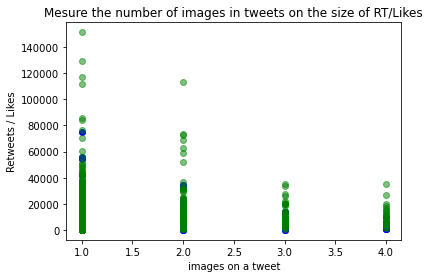

In [76]:
# Using scatter plot to represent images at x-axis in RT/Likes in y-axis

plt.scatter(df_master['img_num'], df_master['retweet_count'] , color ='b'  )
plt.scatter(df_master['img_num'], df_master['favorite_count'] , color = 'g' , alpha=0.5);
plt.xlabel('images on a tweet')
plt.ylabel('Retweets / Likes');
plt.title('Mesure the number of images in tweets on the size of RT/Likes');


## 4.2 What is the most liked type of the four types in the dataset ?

In [77]:
# check possible values
df_master['dog_type'].unique()

array([nan, 'puppo', 'pupper', 'doggo', 'floofer'], dtype=object)

In [78]:
# get the mean RT&Likes per dog type using goupby
dogs_type = df_master.groupby('dog_type').mean()[['retweet_count' , 'favorite_count']].astype(int)

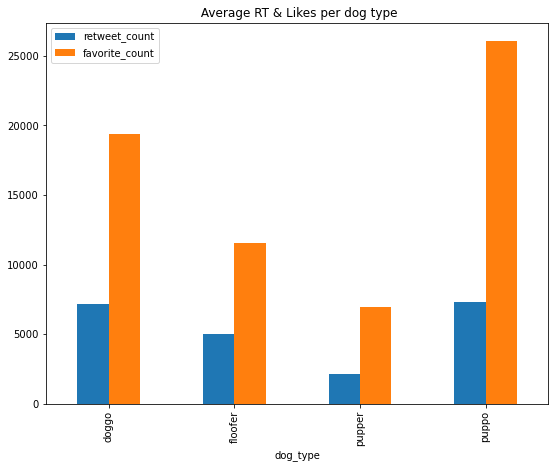

In [79]:
# reprsent our results using bar chart
dogs_type.plot.bar(figsize = (9,7) );
plt.title(' Average RT & Likes per dog type');

## 4.3 What is the most accurate prediction algorithm in detecting a dog ?

In [80]:
# assigning each prediction algorithm accuratcy precentage
p1_accuracy =  df_master[df_master['p1_dog'] == True].shape[0] / df_master.shape[0]
p2_accuracy =  df_master[df_master['p2_dog'] == True].shape[0] / df_master.shape[0]
p3_accuracy =  df_master[df_master['p3_dog'] == True].shape[0] / df_master.shape[0]

In [81]:
p1_accuracy , p2_accuracy , p3_accuracy

(0.7421931735657226, 0.7545388525780683, 0.729121278140886)